In [1]:
import ftplib
import os
import pandas as pd

In [2]:
SOIL_CSV_HEAD = "ID,ID_TYPE,OB_TIME,MET_DOMAIN_NAME,VERSION_NUM,SRC_ID,REC_ST_IND,Q5CM_SOIL_TEMP,Q10CM_SOIL_TEMP,Q20CM_SOIL_TEMP,Q30CM_SOIL_TEMP,Q50CM_SOIL_TEMP,Q100CM_SOIL_TEMP,Q5CM_SOIL_TEMP_Q,Q10CM_SOIL_TEMP_Q,Q20CM_SOIL_TEMP_Q,Q30CM_SOIL_TEMP_Q,Q50CM_SOIL_TEMP_Q,Q100CM_SOIL_TEMP_Q,METO_STMP_TIME,MIDAS_STMP_ETIME,Q5CM_SOIL_TEMP_J,Q10CM_SOIL_TEMP_J,Q20CM_SOIL_TEMP_J,Q30CM_SOIL_TEMP_J,Q50CM_SOIL_TEMP_J,Q100CM_SOIL_TEMP_J"
TEMP_CSV_HEAD = "OB_END_TIME,ID_TYPE,ID,OB_HOUR_COUNT,VERSION_NUM,MET_DOMAIN_NAME,SRC_ID,REC_ST_IND,MAX_AIR_TEMP,MIN_AIR_TEMP,MIN_GRSS_TEMP,MIN_CONC_TEMP,MAX_AIR_TEMP_Q,MIN_AIR_TEMP_Q,MIN_GRSS_TEMP_Q,MIN_CONC_TEMP_Q,METO_STMP_TIME,MIDAS_STMP_ETIME,MAX_AIR_TEMP_J,MIN_AIR_TEMP_J,MIN_GRSS_TEMP_J,MIN_CONC_TEMP_J "

In [3]:
SOURCE_ROOT = "badc/ukmo-midas/data/"



In [4]:
def download_data (subfolder, fileRoot, dataFrom, dataTo):
    connection =ftplib.FTP("ftp.ceda.ac.uk", "rnicoll", "Windows.7")
    connection.cwd(SOURCE_ROOT+subfolder)
    while dataFrom != 202001 and dataTo != 202012:
    
        dataFrom+=100
        dataTo+=100

        #get file
        fileHead = fileRoot+str(dataFrom)+"-"+str(dataTo)
        fileName = fileHead+".txt"

        connection.retrbinary("RETR %s" % fileName, open("data/"+ subfolder + fileName, "wb").write)
        print(fileName)
    connection.close()

In [5]:
def parse_to_CSV (subfolder, fileRoot, dataFrom, dataTo, CSV_HEAD):
    while dataFrom != 202001 and dataTo != 202012:

        dataFrom+=100
        dataTo+=100

        #get file
        fileHead = fileRoot+str(dataFrom)+"-"+str(dataTo)
        fileName = fileHead+".txt"
        print("Opening "+fileName)

        line_prepender("data/" +subfolder+fileName,CSV_HEAD+"\n")

        base = os.path.splitext(fileName)[0]
        os.rename("data/"+subfolder+fileName, "data/"+subfolder+base + ".csv")
        print("CSV saved")

In [6]:
def line_prepender(filename, line):
    with open(filename, 'r+') as f:
        content = f.read()
        f.seek(0, 0)
        f.write(line.rstrip('\r\n') + '\n' + content)
        f.close()

In [7]:
download_data("ST/yearly_files/","midas_soiltemp_",190301,190312)
download_data("TD/yearly_files/","midas_tempdrnl_",190301,190312)

midas_soiltemp_190401-190412.txt
midas_soiltemp_190501-190512.txt
midas_soiltemp_190601-190612.txt
midas_soiltemp_190701-190712.txt
midas_soiltemp_190801-190812.txt
midas_soiltemp_190901-190912.txt
midas_soiltemp_191001-191012.txt
midas_soiltemp_191101-191112.txt
midas_soiltemp_191201-191212.txt
midas_soiltemp_191301-191312.txt
midas_soiltemp_191401-191412.txt
midas_soiltemp_191501-191512.txt
midas_soiltemp_191601-191612.txt
midas_soiltemp_191701-191712.txt
midas_soiltemp_191801-191812.txt
midas_soiltemp_191901-191912.txt
midas_soiltemp_192001-192012.txt
midas_soiltemp_192101-192112.txt
midas_soiltemp_192201-192212.txt
midas_soiltemp_192301-192312.txt
midas_soiltemp_192401-192412.txt
midas_soiltemp_192501-192512.txt


KeyboardInterrupt: 

In [ ]:
parse_to_CSV("ST/yearly_files/","midas_soiltemp_",190301,190312, SOIL_CSV_HEAD)
parse_to_CSV("TD/yearly_files/","midas_tempdrnl_",190301,190312, TEMP_CSV_HEAD)


In [ ]:
dtypes={
'ID': int,
'ID_TYPE': "string",
'OB_TIME': "string",
'MET_DOMAIN_NAME': "string",
'VERSION_NUM': int,
'SRC_ID': int,
'REC_ST_IND': "string",
'Q5CM_SOIL_TEMP': "string",
'Q10CM_SOIL_TEMP': "string",
'Q20CM_SOIL_TEMP': "string",
'Q30CM_SOIL_TEMP': "string",
'Q50CM_SOIL_TEMP': "string",
'Q100CM_SOIL_TEMP': "string",
'Q5CM_SOIL_TEMP_Q': "string",
'Q10CM_SOIL_TEMP_Q': "string",
'Q20CM_SOIL_TEMP_Q': "string",
'Q30CM_SOIL_TEMP_Q': "string",
'Q50CM_SOIL_TEMP_Q': "string",
'Q100CM_SOIL_TEMP_Q': int,
'METO_STMP_TIME': "string",
'MIDAS_STMP_ETIME': "string",
'Q5CM_SOIL_TEMP_J': "string",
'Q10CM_SOIL_TEMP_J': "string",
'Q20CM_SOIL_TEMP_J': "string",
'Q30CM_SOIL_TEMP_J': "string",
'Q50CM_SOIL_TEMP_J': "string",
'Q100CM_SOIL_TEMP_J': "string"
}

#idk if this is needed

In [18]:
newTest = pd.read_csv("airCSVData/midas_tempdrnl_200001-200012.csv",sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
print(newTest['SRC_ID'])

0         24940.0
1           526.0
2         18905.0
3         18995.0
4         24942.0
           ...   
346879     1585.0
346880     1588.0
346881     1603.0
346882     1609.0
346883     1572.0
Name: SRC_ID, Length: 346884, dtype: float64


In [21]:
soilData = pd.read_csv("soilCSVData/midas_soiltemp_200001-200012.csv",sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

In [39]:
#newTest['ID']=
p = newTest['ID'] == 5400
beep = newTest[p]

d = beep['MIDAS_STMP_ETIME'] == 4116

boop = beep[d]
print(boop.iloc[0])

OB_END_TIME         2000-04-23 09:00
ID_TYPE                         DCNN
ID                              5400
OB_HOUR_COUNT                     12
VERSION_NUM                        1
MET_DOMAIN_NAME                  NCM
SRC_ID                           779
REC_ST_IND                      1011
MAX_AIR_TEMP                    10.4
MIN_AIR_TEMP                     6.5
MIN_GRSS_TEMP                    2.2
MIN_CONC_TEMP                    NaN
MAX_AIR_TEMP_Q                     1
MIN_AIR_TEMP_Q                     1
MIN_GRSS_TEMP_Q                    1
MIN_CONC_TEMP_Q                    1
METO_STMP_TIME      2000-04-23 09:04
MIDAS_STMP_ETIME                4116
MAX_AIR_TEMP_J                   NaN
MIN_AIR_TEMP_J                   NaN
MIN_GRSS_TEMP_J                  NaN
MIN_CONC_TEMP_J                  NaN
Name: 106248, dtype: object


In [15]:
print(newTest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945477 entries, 0 to 945476
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  945477 non-null  int64  
 1   ID_TYPE             945477 non-null  object 
 2   OB_TIME             945477 non-null  object 
 3   MET_DOMAIN_NAME     945477 non-null  object 
 4   VERSION_NUM         945476 non-null  float64
 5   SRC_ID              945476 non-null  float64
 6   REC_ST_IND          945476 non-null  float64
 7   Q5CM_SOIL_TEMP      31 non-null      float64
 8   Q10CM_SOIL_TEMP     901400 non-null  float64
 9   Q20CM_SOIL_TEMP     35663 non-null   float64
 10  Q30CM_SOIL_TEMP     111999 non-null  float64
 11  Q50CM_SOIL_TEMP     21644 non-null   float64
 12  Q100CM_SOIL_TEMP    68347 non-null   float64
 13  Q5CM_SOIL_TEMP_Q    945422 non-null  float64
 14  Q10CM_SOIL_TEMP_Q   945455 non-null  float64
 15  Q20CM_SOIL_TEMP_Q   945422 non-nul

ID                                5400
ID_TYPE                           DCNN
OB_TIME               2000-04-23 09:00
MET_DOMAIN_NAME                    NCM
VERSION_NUM                          1
SRC_ID                             779
REC_ST_IND                        1011
Q5CM_SOIL_TEMP                     NaN
Q10CM_SOIL_TEMP                   10.8
Q20CM_SOIL_TEMP                    NaN
Q30CM_SOIL_TEMP                   10.9
Q50CM_SOIL_TEMP                    NaN
Q100CM_SOIL_TEMP                   9.4
Q5CM_SOIL_TEMP_Q                     1
Q10CM_SOIL_TEMP_Q                    1
Q20CM_SOIL_TEMP_Q                    1
Q30CM_SOIL_TEMP_Q                    1
Q50CM_SOIL_TEMP_Q                    1
Q100CM_SOIL_TEMP_Q                   1
METO_STMP_TIME        2000-04-23 09:04
MIDAS_STMP_ETIME                  4116
Q5CM_SOIL_TEMP_J                   NaN
Q10CM_SOIL_TEMP_J                  NaN
Q20CM_SOIL_TEMP_J                  NaN
Q30CM_SOIL_TEMP_J                  NaN
Q50CM_SOIL_TEMP_J        

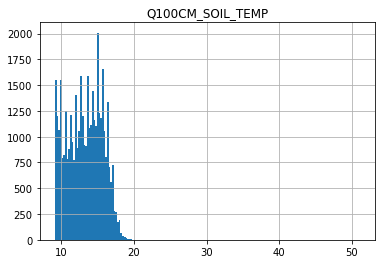

In [24]:


newNewTest = soilData['Q100CM_SOIL_TEMP'] > 9
newestTest = soilData[newNewTest]
#print(newestTest)
print(newestTest.iloc[840])
print(newestTest.hist('Q100CM_SOIL_TEMP', bins = 'auto'))

In [17]:
print(newTest['ID'].where(newTest['Q100CM_SOIL_TEMP'] > 0))

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
945472   NaN
945473   NaN
945474   NaN
945475   NaN
945476   NaN
Name: ID, Length: 945477, dtype: float64
